### Setup

Let's setup Spark on your Colab environment.  Run the cell below!

In [2]:
!pip install pyspark
!apt update
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [53.9 kB]
Hit:12 http://ppa.launchpad.net/cran/

Now we import some of the libraries usually needed by our workload.





In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf
from pyspark.sql.functions import lit


Mounting the drice and making the project folder as the current path

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
cur_path = "/content/drive/My Drive/bigdataproj/"
os.chdir(cur_path)
!ls

Big_data_project.ipynb	FR_videos_data.csv  KR_videos_data.csv
BR_videos_data.csv	GB_videos_data.csv  MX_videos_data.csv
CA_videos_data.csv	IN_videos_data.csv  RU_videos_data.csv
DE_videos_data.csv	JP_videos_data.csv  US_videos_data.csv


Let's initialize the Spark context.

In [6]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

You can easily check the current version and get the link of the web interface. In the Spark UI, you can monitor the progress of your job and debug the performance bottlenecks (if your Colab is running with a **local runtime**).

In [7]:
spark

### Data Preprocessing

For convenience, given that the dataset is small, we first construct a Pandas dataframe, tune the schema, and then convert it into a Spark dataframe.

## Importing all data sets

In [ ]:
!ls

Big_data_project.ipynb	FR_videos_data.csv  KR_videos_data.csv
BR_videos_data.csv	GB_videos_data.csv  MX_videos_data.csv
CA_videos_data.csv	IN_videos_data.csv  RU_videos_data.csv
DE_videos_data.csv	JP_videos_data.csv  US_videos_data.csv


Importing all the datasets for different countries.
1. In a a Pandas data frame format
2. In a spark data frame format

In [8]:
# video_* shows the pandas data frame
# df_* shows the spark data frame


video_data=pd.read_csv('US_videos_data.csv')
df = spark.read.csv('US_videos_data.csv',header=True)

video_data_BR=pd.read_csv('BR_videos_data.csv')
df_BR = spark.read.csv('BR_videos_data.csv',header=True)

video_data_CA=pd.read_csv('CA_videos_data.csv')
df_CA = spark.read.csv('CA_videos_data.csv',header=True)

video_data_DE=pd.read_csv('DE_videos_data.csv')
df_DE = spark.read.csv('DE_videos_data.csv',header=True)

video_data_FR=pd.read_csv('FR_videos_data.csv')
df_FR = spark.read.csv('FR_videos_data.csv',header=True)

video_data_GB=pd.read_csv('GB_videos_data.csv')
df_GB = spark.read.csv('GB_videos_data.csv',header=True)

video_data_IN=pd.read_csv('IN_videos_data.csv')
df_IN = spark.read.csv('IN_videos_data.csv',header=True)

video_data_JP=pd.read_csv('JP_videos_data.csv')
df_JP = spark.read.csv('JP_videos_data.csv',header=True)

video_data_KR=pd.read_csv('KR_videos_data.csv')
df_KR = spark.read.csv('KR_videos_data.csv',header=True)

video_data_MX=pd.read_csv('MX_videos_data.csv')
df_MX = spark.read.csv('MX_videos_data.csv',header=True)

video_data_RU=pd.read_csv('RU_videos_data.csv')
df_RU = spark.read.csv('RU_videos_data.csv',header=True)



# ***About the Data***

The dataset contains a total of 16 columns describing interesting features such as Title, date/time of upload, description of video, and also files were categorized based on the region of Trending, this way it is easy to see which demographics have similarities.
Currently, It contains data from 10 Regions/Countries.


## Distinct Columns
video_id
title	publishedAt	
channelId	
channelTitle	
categoryId	
trending_date	
tags	
view_count	
likes	dislikes	
comment_count	
thumbnail_link	
comments_disabled	
ratings_disabled	
description

# ***US ***

Initial EDA on US to see the number of views against different channel title. Basically to see which channel title get the most views.

**The same methodology will be repeated for different countries in ordert to get the most trending channels.

In [9]:
video_data.head()

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,0,IhO1FcjDMV4,Meatpacking: Last Week Tonight with John Olive...,2021-02-22T07:30:01Z,UC3XTzVzaHQEd30rQbuvCtTQ,LastWeekTonight,24,21.22.02,[none],1067147,60111,1221,6866,https://i.ytimg.com/vi/IhO1FcjDMV4/default.jpg,False,False,The pandemic has thrown into high relief some ...
1,1,p4Wy84AOzj0,"Best 3D Pen Art Wins $5,000 Challenge! | ZHC C...",2021-02-21T20:43:28Z,UCPAk4rqVIwg1NCXh61VJxbg,ZHC Crafts,26,21.22.02,[none],1047854,50662,690,4879,https://i.ytimg.com/vi/p4Wy84AOzj0/default.jpg,False,False,I can't believe we made art using 3d pens and ...
2,2,4eKXwKDdXYA,100 Days - [Minecraft Superflat],2021-02-20T18:00:01Z,UC9FkeEFIGd9FXRfxpTltXYA,Luke TheNotable,20,21.22.02,luke thenotable|luke|the|notable|luke thenotab...,6133266,372753,7961,39551,https://i.ytimg.com/vi/4eKXwKDdXYA/default.jpg,False,False,This video is intended for audiences 13+ years...
3,3,XHR5mt2gBjo,Amazing! Luke Bryan Calls 15-Year-Old Casey Bi...,2021-02-22T01:53:12Z,UCAMPco9PqjBbI_MLsDOO4Jw,American Idol,24,21.22.02,American Idol|singing competition|Katy Perry|R...,790238,14267,129,1257,https://i.ytimg.com/vi/XHR5mt2gBjo/default.jpg,False,False,Small but MIGHTY! Casey Bishop completely blow...
4,4,C-icyHEb7W4,Game Theory: Did Reddit Just SOLVE FNAF?,2021-02-20T19:05:26Z,UCo_IB5145EVNcf8hw1Kku7w,The Game Theorists,20,21.22.02,fnaf|five nights at freddy's|fnaf 4|fnaf theor...,3248661,225780,2872,31885,https://i.ytimg.com/vi/C-icyHEb7W4/default.jpg,False,False,Get Yourself Some BRAND NEW Theory Wear! ► htt...


In [10]:
df.show()

+--------------------+-----------+--------------------+--------------------+--------------------+--------------------+----------+-------------+--------------------+----------+------+--------+-------------+--------------------+-----------------+----------------+--------------------+
|                 _c0|   video_id|               title|         publishedAt|           channelId|        channelTitle|categoryId|trending_date|                tags|view_count| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|         description|
+--------------------+-----------+--------------------+--------------------+--------------------+--------------------+----------+-------------+--------------------+----------+------+--------+-------------+--------------------+-----------------+----------------+--------------------+
|                   0|IhO1FcjDMV4|Meatpacking: Last...|2021-02-22T07:30:01Z|UC3XTzVzaHQEd30rQ...|     LastWeekTonight|        24|     21.22.02|        

Lets filter out the columns that we think would be the most important both in terms of understanding the problem at hand and also making predictions.

In addition change the data type to the desired type 
view counts, like, dislike, comment count, cateforyID as INT
published and trending as dates

In [12]:
"""
Here we are converting the columns to desired data type
"""

df=df.withColumn("view_count", df["view_count"].cast("int"))\
.withColumn("likes", df["likes"].cast("int"))\
.withColumn("dislikes", df["dislikes"].cast("int"))\
.withColumn("comment_count", df["comment_count"].cast("int"))\
.withColumn("trending_date", to_timestamp(df["trending_date"], "yy.dd.MM"))\
.withColumn("time_published", to_timestamp(df["publishedAt"], "yyyy-MM-dd"))\
.withColumn("categoryId", df["categoryId"].cast('int'))\
.select('view_count','title','tags','channelTitle','categoryId','likes','dislikes','comment_count')


In [13]:
Regression_data=df

In [14]:
Regression_data.show()

+----------+--------------------+--------------------+--------------------+----------+------+--------+-------------+
|view_count|               title|                tags|        channelTitle|categoryId| likes|dislikes|comment_count|
+----------+--------------------+--------------------+--------------------+----------+------+--------+-------------+
|   1067147|Meatpacking: Last...|              [none]|     LastWeekTonight|        24| 60111|    1221|         6866|
|   1047854|Best 3D Pen Art W...|              [none]|          ZHC Crafts|        26| 50662|     690|         4879|
|   6133266|100 Days - [Minec...|luke thenotable|l...|     Luke TheNotable|        20|372753|    7961|        39551|
|    790238|Amazing! Luke Bry...|American Idol|sin...|       American Idol|        24| 14267|     129|         1257|
|   3248661|Game Theory: Did ...|fnaf|five nights ...|  The Game Theorists|        20|225780|    2872|        31885|
|    297852|Deion Sanders win...|deion sanders|dei...|ESPN Colle

let's see the count against every category ID

Therefore, we group it by category ID and the sum all views across the df

The we will do the same for every channel title i.e. grouping on channel title in order to see the number of views

In [15]:
df_category=df.groupBy('categoryId').sum().select('categoryId','sum(view_count)')

In [16]:
df_1=df.groupBy('channelTitle').sum()
df_1.orderBy(df_1['sum(view_count)'].desc()).limit(10).show()

+----------------+---------------+---------------+----------+-------------+------------------+
|    channelTitle|sum(view_count)|sum(categoryId)|sum(likes)|sum(dislikes)|sum(comment_count)|
+----------------+---------------+---------------+----------+-------------+------------------+
|       BLACKPINK|      980149319|            390|  91593351|      1000541|          13620062|
|         MrBeast|      508233148|            480|  30808435|       301393|           1841741|
|            NASA|      251983185|            644|   6503560|       127019|            181139|
|  MrBeast Shorts|      239524743|            638|  14929481|       237397|            694824|
|JustinBieberVEVO|      203196414|            180|  14238196|       281495|            991264|
|      Bruno Mars|      199578766|            300|  10524777|        82342|            629219|
|           Dream|      195730673|            200|  13577320|       236611|            998831|
|       LazarBeam|      191755192|            600|

Views per channel ID

BLACKPINK is the most trending channel followed by MrBeast in terms of number of views in the US

<Figure size 432x288 with 0 Axes>

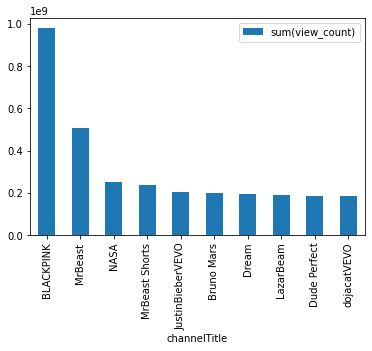

In [17]:
# Plotting total views per channel ID

plt.clf()
df_1.orderBy(df_1['sum(view_count)'].desc()).limit(10).toPandas().plot(x='channelTitle',y='sum(view_count)',kind='bar')
display()




# ***Brazil***

Lets repeat the same process for Brazil 

The aim is to see the total views against a channel.

The details written for the above view count for US will be followed exactly in order to get the view count for Brazil by channel title.

Checking the data: columns

In [ ]:
video_data_BR.head()

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,0,cSxfqLr27mA,LIVE NOSSA HISTÓRIA,2021-02-22T00:55:43Z,UCmRkuNc6evsLa3JKX2IVHvg,Taty Girl,10,21.22.02,Taty Girl|Gospel|Live Gospel|Taty|Nathalia Lea...,508325,29158,518,654,https://i.ytimg.com/vi/cSxfqLr27mA/default.jpg,False,False,Preparem-se para a MAIOR Live de Forró da Hist...
1,1,2ssmXORmr90,JÁ TESTEI O NOVO PERSONAGEM MAIS APELÃO DO 4V4...,2021-02-21T20:00:00Z,UC4IMfO_--bwBaNgWeoLxAgg,PlayHard,20,21.22.02,Free Fire|PlayHard|LOUD|Play|Hard|lançamento|n...,631324,92319,961,3009,https://i.ytimg.com/vi/2ssmXORmr90/default.jpg,False,False,Baixe grátis aqui: https://go.onelink.me/32696...
2,2,dRs_JkkjTCU,TOUR PELO MEU APARTAMENTO!,2021-02-21T22:18:07Z,UCRKMoImiahCNu833HVQVhBA,Luiza Parente,23,21.22.02,[none],423886,81366,407,2395,https://i.ytimg.com/vi/dRs_JkkjTCU/default.jpg,False,False,INSTA: @luizaparenteTIKTOK: @luizaparenteE-MAI...
3,3,JTSdcVPyt5A,LBFF 4 - Rodada 10 - Grupos B e A | Free Fire,2021-02-21T19:53:45Z,UCr4ARxgElIO21GWfIraZezg,Free Fire - Brasil,22,21.22.02,garena|free|fire|free fire|diamante royale|pro...,2390949,227436,1241,1583,https://i.ytimg.com/vi/JTSdcVPyt5A/default.jpg,False,False,Os grupos B e A se enfrentaram pela Rodada 10 ...
4,4,nEe-9ghoPjo,Coletiva de imprensa | Flamengo 2 x 1 Internac...,2021-02-21T22:12:18Z,UCOa-WaNwQaoyFHLCDk7qKIw,FLA TV,17,21.22.02,Clube de Regatas do Flamengo|Flamengo|Mengão|M...,273428,27715,210,557,https://i.ytimg.com/vi/nEe-9ghoPjo/default.jpg,False,False,Inscreva-se na #FlaTV. Vídeos todos os dias!Su...


In [ ]:
df_BR.show()

+---+-----------+-----------------------+--------------------+--------------------+--------------------+----------+-------------+--------------------+----------+------+--------+-------------+--------------------+-----------------+----------------+--------------------+
|_c0|   video_id|                  title|         publishedAt|           channelId|        channelTitle|categoryId|trending_date|                tags|view_count| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|         description|
+---+-----------+-----------------------+--------------------+--------------------+--------------------+----------+-------------+--------------------+----------+------+--------+-------------+--------------------+-----------------+----------------+--------------------+
|  0|cSxfqLr27mA|    LIVE NOSSA HISTÓRIA|2021-02-22T00:55:43Z|UCmRkuNc6evsLa3JK...|           Taty Girl|        10|     21.22.02|Taty Girl|Gospel|...|    508325| 29158|     518|          654|ht

Checking the data types

In [ ]:
df_BR.summary()

DataFrame[summary: string, _c0: string, video_id: string, title: string, publishedAt: string, channelId: string, channelTitle: string, categoryId: string, trending_date: string, tags: string, view_count: string, likes: string, dislikes: string, comment_count: string, thumbnail_link: string, comments_disabled: string, ratings_disabled: string, description: string]

Converting the data types into the desired data types and sub setting necessary columns as mentioned earlier

In [ ]:
df_BR=df_BR.withColumn("view_count", df_BR["view_count"].cast("int"))\
.withColumn("likes", df_BR["likes"].cast("int"))\
.withColumn("dislikes", df_BR["dislikes"].cast("int"))\
.withColumn("comment_count", df_BR["comment_count"].cast("int"))\
.withColumn("trending_date", to_timestamp(df_BR["trending_date"], "yy.dd.MM"))\
.withColumn("time_published", to_timestamp(df_BR["publishedAt"], "yyyy-MM-dd"))\
.withColumn("categoryId", df_BR["categoryId"].cast('int'))\
.select('view_count','title','tags','channelTitle','categoryId','likes','dislikes','comment_count')


In [ ]:
Regression_data_df_BR=df_BR

In [ ]:
Regression_data_df_BR.show()

+----------+-----------------------+--------------------+--------------------+----------+------+--------+-------------+
|view_count|                  title|                tags|        channelTitle|categoryId| likes|dislikes|comment_count|
+----------+-----------------------+--------------------+--------------------+----------+------+--------+-------------+
|    508325|    LIVE NOSSA HISTÓRIA|Taty Girl|Gospel|...|           Taty Girl|        10| 29158|     518|          654|
|    631324|   JÁ TESTEI O NOVO ...|Free Fire|PlayHar...|            PlayHard|        20| 92319|     961|         3009|
|    423886|   TOUR PELO MEU APA...|              [none]|       Luiza Parente|        23| 81366|     407|         2395|
|   2390949|   LBFF 4 - Rodada 1...|garena|free|fire|...|  Free Fire - Brasil|        22|227436|    1241|         1583|
|    273428|   Coletiva de impre...|Clube de Regatas ...|              FLA TV|        17| 27715|     210|          557|
|    255391|   Flamengo a uma vi...|    

checking the necessary view counts by cateogry id and channel title


In [ ]:
df_BR_category=df_BR.groupBy('categoryId').sum().select('categoryId','sum(view_count)')

In [ ]:
df_BR_1=df_BR.groupBy('channelTitle').sum()
df_BR_1.orderBy(df_BR_1['sum(view_count)'].desc()).limit(10).show()

+--------------------+---------------+---------------+----------+-------------+------------------+
|        channelTitle|sum(view_count)|sum(categoryId)|sum(likes)|sum(dislikes)|sum(comment_count)|
+--------------------+---------------+---------------+----------+-------------+------------------+
|           BLACKPINK|      929403847|            340|  87992458|       941584|          12937958|
|                NASA|      298664453|            672|   7644454|       149194|            232762|
|              SMTOWN|      293396674|            230|  25689030|       208848|           3775261|
|          Bruno Mars|      274809022|            190|  13307021|       110523|            747607|
|    JustinBieberVEVO|      247419944|            210|  16730636|       334051|           1178008|
|         Brawl Stars|      216728687|            200|  10030915|       102445|           1264003|
|Gusttavo Lima Ofi...|      210143128|            350|   9275718|        88904|            138461|
|         

Plotting a histogram to see the most trending channel in Brazil

As you can see like America BLACKPINK is the most trending channel in Brazil

<Figure size 432x288 with 0 Axes>

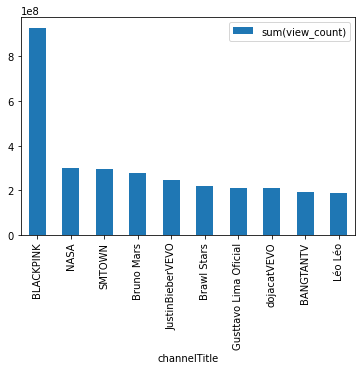

In [ ]:
plt.clf()
df_BR_1.orderBy(df_BR_1['sum(view_count)'].desc()).limit(10).toPandas().plot(x='channelTitle',y='sum(view_count)',kind='bar')
display()




## ***Japan***

Let's look at the most trending channel in japan

Connvert the data types and take a look at the data set

Most of it is in Japenese so I wouldn't be able to make sense of what is written inside :P

In [ ]:
df_JP=df_JP.withColumn("view_count", df_JP["view_count"].cast("int"))\
.withColumn("likes", df_JP["likes"].cast("int"))\
.withColumn("dislikes", df_JP["dislikes"].cast("int"))\
.withColumn("comment_count", df_JP["comment_count"].cast("int"))\
.withColumn("trending_date", to_timestamp(df_JP["trending_date"], "yy.dd.MM"))\
.withColumn("time_published", to_timestamp(df_JP["publishedAt"], "yyyy-MM-dd"))\
.withColumn("categoryId", df_JP["categoryId"].cast('int'))\
.select('view_count','title','tags','channelTitle','categoryId','likes','dislikes','comment_count')


In [ ]:
Regression_data_df_JP=df_JP

In [ ]:
Regression_data_df_JP.show()

+----------+-------------------------------------+------------------------------------+-------------------------------+----------+-----+--------+-------------+
|view_count|                                title|                                tags|                   channelTitle|categoryId|likes|dislikes|comment_count|
+----------+-------------------------------------+------------------------------------+-------------------------------+----------+-----+--------+-------------+
|    381483|【新企画】宮迫さんと居酒屋堤下。本...| 宮迫さん|居酒屋堤下|コラボ|堤下食堂|                       堤下食堂|        26|12342|     823|         1209|
|    148446| 【齊藤京子（日向坂４６）×日高屋】...|            きょんこ|味噌チゲ|日高家|           日高屋公式チャンネル|        24| 7797|     109|          736|
|    821488|【アニメ遠井さん】やる気なさすぎな...| すとぷり|すとろべりーぷりんす|さ...|             すとぷりちゃんねる|        24|57909|     397|         3414|
|    708094|【カメラ】はじめてのクッキー作り！...|   莉犬|莉犬くん|りけんくん|すとぷり|     莉犬くんのサブちゃんねる！|        23|68104|     313|         7466|
|    534528|       シブヤ・ディビジョン“Fling ...|

Aggregate total number of views on the basis of channel title and category

In [ ]:
df_JP_category=df_JP.groupBy('categoryId').sum().select('categoryId','sum(view_count)')

In [ ]:
df_JP_1=df_JP.groupBy('channelTitle').sum()
df_JP_1.orderBy(df_JP_1['sum(view_count)'].desc()).limit(10).show()

+----------------+---------------+---------------+----------+-------------+------------------+
|    channelTitle|sum(view_count)|sum(categoryId)|sum(likes)|sum(dislikes)|sum(comment_count)|
+----------------+---------------+---------------+----------+-------------+------------------+
|       BLACKPINK|      938914542|            270|  83038240|       948482|          13143830|
|      Bruno Mars|      184218556|             80|   9163209|        77485|            523360|
|    東海オンエア|      180043060|           2070|   3808820|        63588|            378766|
|          SMTOWN|      176168399|             90|  11077753|       117920|           1418929|
|            NASA|      170547471|            308|   4242795|        81274|            165373|
|JustinBieberVEVO|      165285061|            110|  11080648|       229075|            794920|
|       Daft Punk|      165255269|             80|  10650441|       194102|           1260783|
|     Brawl Stars|      163861531|            160|   786

Lets see the most trending channel

As you can see like America blackpink is the most trending channel in japan

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28023 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12458 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12450 missing from current font.
  font.set_

<Figure size 432x288 with 0 Axes>

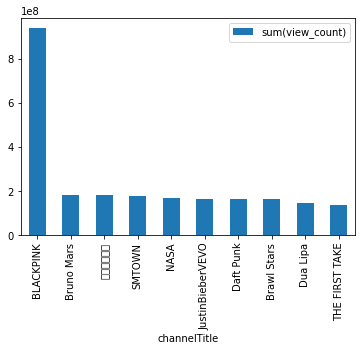

In [ ]:
plt.clf()
df_JP_1.orderBy(df_JP_1['sum(view_count)'].desc()).limit(10).toPandas().plot(x='channelTitle',y='sum(view_count)',kind='bar')
display()




## ***India***

lets repeat the same process for India and see the total number of views per channel and category and then plot it to see the most trending channel.

1. Convert data type of columns
2. group by channel title and category
3. plor the count against channel title

In [ ]:
df_IN=df_IN.withColumn("view_count", df_IN["view_count"].cast("int"))\
.withColumn("likes", df_IN["likes"].cast("int"))\
.withColumn("dislikes", df_IN["dislikes"].cast("int"))\
.withColumn("comment_count", df_IN["comment_count"].cast("int"))\
.withColumn("trending_date", to_timestamp(df_IN["trending_date"], "yy.dd.MM"))\
.withColumn("time_published", to_timestamp(df_IN["publishedAt"], "yyyy-MM-dd"))\
.withColumn("categoryId", df_IN["categoryId"].cast('int'))\
.select('view_count','title','tags','channelTitle','categoryId','likes','dislikes','comment_count')


In [ ]:
Regression_data_df_IN=df_IN

In [ ]:
Regression_data_df_IN.show()

+----------+--------------------+--------------------+--------------------+----------+------+--------+-------------+
|view_count|               title|                tags|        channelTitle|categoryId| likes|dislikes|comment_count|
+----------+--------------------+--------------------+--------------------+----------+------+--------+-------------+
|   3951991|Jagame Thandhiram...|netflix india|net...|       Netflix India|        24|362838|    5501|        12461|
|   6091233|New Punjabi Songs...|Punjabi Songs|Lat...| Single Track Studio|        10|212128|    5464|         6460|
|      null|                null|                null|                null|      null|  null|    null|         null|
|      null|                null|                null|                null|      null|  null|    null|         null|
|      null|                null|                null|                null|      null|  null|    null|         null|
|      null|                null|                null|          

In [ ]:
df_IN_category=df_IN.groupBy('categoryId').sum().select('categoryId','sum(view_count)')

In [ ]:
df_IN_1=df_IN.groupBy('channelTitle').sum()
df_IN_1.orderBy(df_IN_1['sum(view_count)'].desc()).limit(10).show()

+------------------+---------------+---------------+----------+-------------+------------------+
|      channelTitle|sum(view_count)|sum(categoryId)|sum(likes)|sum(dislikes)|sum(comment_count)|
+------------------+---------------+---------------+----------+-------------+------------------+
|          T-Series|     1089022325|            530|  37467218|      1310027|           2177770|
|  Sony Music India|      843730243|            360|  15173052|      1552926|           2058362|
|         BLACKPINK|      638460209|            240|  63344838|       623681|          10774929|
|Desi Music Factory|      404880064|            250|  18539942|      1842963|           2609207|
|      Aditya Music|      335768062|            300|  10271106|       298812|            489674|
|  Vijay Television|      274406639|           2160|   6481969|        85487|            144414|
|         Crazy XYZ|      239584122|           1820|  16710586|       674501|           1152135|
|     Speed Records|      2392

Finally we can see that there is a difference from US and T-Series instead of BLACKPINK is the most trending channel

<Figure size 432x288 with 0 Axes>

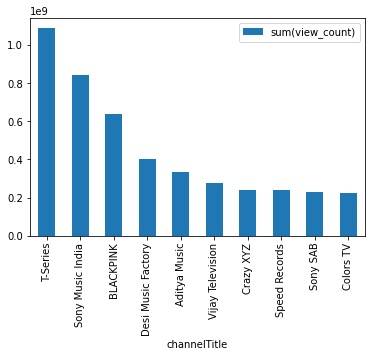

In [ ]:
plt.clf()
df_IN_1.orderBy(df_IN_1['sum(view_count)'].desc()).limit(10).toPandas().plot(x='channelTitle',y='sum(view_count)',kind='bar')
display()




## ***GB - United Kingdom***

lets repeat the same process for UK and see the total number of views per channel and category and then plot it to see the most trending channel.

1. Convert data type of columns
2. group by channel title and category
3. plor the count against channel title

In [ ]:
df_GB=df_GB.withColumn("view_count", df_GB["view_count"].cast("int"))\
.withColumn("likes", df_GB["likes"].cast("int"))\
.withColumn("dislikes", df_GB["dislikes"].cast("int"))\
.withColumn("comment_count", df_GB["comment_count"].cast("int"))\
.withColumn("trending_date", to_timestamp(df_GB["trending_date"], "yy.dd.MM"))\
.withColumn("time_published", to_timestamp(df_GB["publishedAt"], "yyyy-MM-dd"))\
.withColumn("categoryId", df_GB["categoryId"].cast('int'))\
.select('view_count','title','tags','channelTitle','categoryId','likes','dislikes','comment_count')


In [ ]:
Regression_data_df_GB=df_GB

In [ ]:
df_GB_category=df_GB.groupBy('categoryId').sum().select('categoryId','sum(view_count)')

In [ ]:
df_GB_1=df_GB.groupBy('channelTitle').sum()
df_GB_1.orderBy(df_GB_1['sum(view_count)'].desc()).limit(10).show()

+----------------+---------------+---------------+----------+-------------+------------------+
|    channelTitle|sum(view_count)|sum(categoryId)|sum(likes)|sum(dislikes)|sum(comment_count)|
+----------------+---------------+---------------+----------+-------------+------------------+
|       BLACKPINK|      755473024|            320|  76986861|       777843|          11251981|
|         MrBeast|      389373353|            384|  23876077|       228824|           1399116|
|            NASA|      196377719|            560|   5152810|        99314|            155540|
|JustinBieberVEVO|      183798786|            170|  13110603|       256890|            903637|
|       LazarBeam|      170546869|            540|   8992030|        99471|            867873|
|      Bruno Mars|      155286027|            150|   8525430|        67782|            496655|
|    Dude Perfect|      145709967|            255|   5979172|        90335|            333413|
|       Daft Punk|      141527024|             70|

BLACKPINK is famous across the globe I guess

<Figure size 432x288 with 0 Axes>

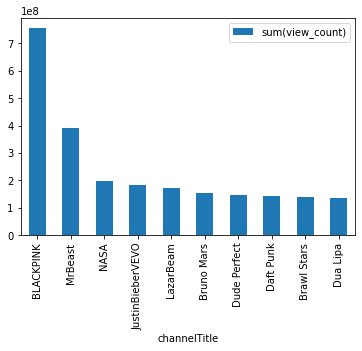

In [ ]:
plt.clf()
df_GB_1.orderBy(df_GB_1['sum(view_count)'].desc()).limit(10).toPandas().plot(x='channelTitle',y='sum(view_count)',kind='bar')
display()




In [ ]:
df_RU

## ***Russia***

lets repeat the same process for Russia and see the total number of views per channel and category and then plot it to see the most trending channel.

1. Convert data type of columns
2. group by channel title and category
3. plor the count against channel title

In [ ]:
df_RU=df_RU.withColumn("view_count", df_RU["view_count"].cast("int"))\
.withColumn("likes", df_RU["likes"].cast("int"))\
.withColumn("dislikes", df_RU["dislikes"].cast("int"))\
.withColumn("comment_count", df_RU["comment_count"].cast("int"))\
.withColumn("trending_date", to_timestamp(df_RU["trending_date"], "yy.dd.MM"))\
.withColumn("time_published", to_timestamp(df_RU["publishedAt"], "yyyy-MM-dd"))\
.withColumn("categoryId", df_RU["categoryId"].cast('int'))\
.select('view_count','title','tags','channelTitle','categoryId','likes','dislikes','comment_count')


In [ ]:
Regression_data_df_RU=df_RU

In [ ]:
df_RU_category=df_RU.groupBy('categoryId').sum().select('categoryId','sum(view_count)')

In [ ]:
df_RU_1=df_RU.groupBy('channelTitle').sum()
df_RU_1.orderBy(df_RU_1['sum(view_count)'].desc()).limit(10).show()

+--------------------+---------------+---------------+----------+-------------+------------------+
|        channelTitle|sum(view_count)|sum(categoryId)|sum(likes)|sum(dislikes)|sum(comment_count)|
+--------------------+---------------+---------------+----------+-------------+------------------+
|                  A4|      334439867|           1056|  34171081|       808876|           3696126|
|           BLACKPINK|      299124105|            160|  34645051|       279648|           5558716|
|               вДудь|       62582402|            220|   3614658|       191628|            381184|
|          Mamix Live|       58697796|           1342|   7142450|        95723|            315332|
|           BANGTANTV|       54411246|            110|  15225319|        24840|           1210930|
|           Daft Punk|       53276441|             30|   3431183|        58869|            419221|
|    JustinBieberVEVO|       51019123|             60|   4752879|        82953|            329648|
|         

Finally we see another country where BLACKPINK is not at top

A4 takes the lead here

<Figure size 432x288 with 0 Axes>

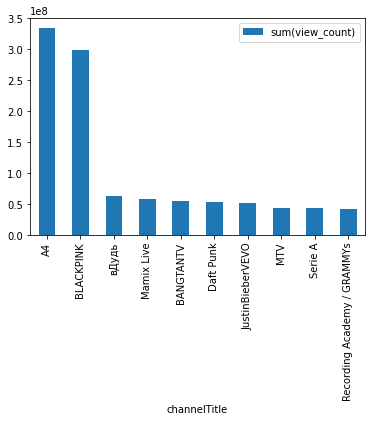

In [ ]:
plt.clf()
df_RU_1.orderBy(df_RU_1['sum(view_count)'].desc()).limit(10).toPandas().plot(x='channelTitle',y='sum(view_count)',kind='bar')
display()




DE

In [ ]:
df_DE=df_DE.withColumn("view_count", df_DE["view_count"].cast("int"))\
.withColumn("likes", df_DE["likes"].cast("int"))\
.withColumn("dislikes", df_DE["dislikes"].cast("int"))\
.withColumn("comment_count", df_DE["comment_count"].cast("int"))\
.withColumn("trending_date", to_timestamp(df_DE["trending_date"], "yy.dd.MM"))\
.withColumn("time_published", to_timestamp(df_DE["publishedAt"], "yyyy-MM-dd"))\
.withColumn("categoryId", df_DE["categoryId"].cast('int'))\
.select('view_count','title','tags','channelTitle','categoryId','likes','dislikes','comment_count')


In [ ]:
Regression_data_df_DE=df_DE

In [ ]:
df_DE_category=df_DE.groupBy('categoryId').sum().select('categoryId','sum(view_count)')

In [ ]:
df_DE_1=df_DE.groupBy('channelTitle').sum()
df_DE_1.orderBy(df_DE_1['sum(view_count)'].desc()).limit(10).show()

+-------------------+---------------+---------------+----------+-------------+------------------+
|       channelTitle|sum(view_count)|sum(categoryId)|sum(likes)|sum(dislikes)|sum(comment_count)|
+-------------------+---------------+---------------+----------+-------------+------------------+
|          BLACKPINK|      597357452|            290|  63865692|       597340|           9386616|
|            MrBeast|      213884786|            240|  13969255|       126174|            814811|
|   Sony Music India|      169681894|             60|   3261709|       312719|            612263|
|          TIKTORIKI|      152590623|            207|   3460087|       190711|             13033|
|   JustinBieberVEVO|      148943124|            160|  11042222|       210922|            738633|
|웃웃TwinsFromRussia|      139147405|            198|   6787054|       231596|             31995|
|           Dua Lipa|      112221337|             70|   5738411|       104530|            209974|
|               NASA| 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 432x288 with 0 Axes>

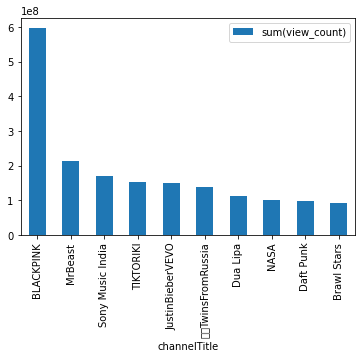

In [ ]:
plt.clf()
df_DE_1.orderBy(df_DE_1['sum(view_count)'].desc()).limit(10).toPandas().plot(x='channelTitle',y='sum(view_count)',kind='bar')
display()




We have seen that for a lot of countries the trending channels are the same and for a lot they are different

Now we will plot the top trending channel for Russian, US and India in order to see a comparison of the difference in views.


TOP comparison channels US India Russia

In [ ]:
# taking the top 1 for all three
US_1 = df_1.orderBy(df_1['sum(view_count)'].desc()).limit(1)
RU_1 = df_RU_1.orderBy(df_RU_1['sum(view_count)'].desc()).limit(1)
IN_1 = df_IN_1.orderBy(df_IN_1['sum(view_count)'].desc()).limit(1)

In [ ]:
# changing the column names
US_1 = US_1.withColumn("country",lit("US"))
RU_1 = RU_1.withColumn("country",lit("RU"))
IN_1 = IN_1.withColumn("country",lit("IN"))

In [ ]:
# adding them to make a new data frame
new_yes = US_1.union(RU_1)
new_yes = new_yes.union(IN_1)

In [ ]:
new_yes = new_yes.union(IN_1)

In [ ]:
new_yes.show()

+------------+---------------+---------------+----------+-------------+------------------+-------+
|channelTitle|sum(view_count)|sum(categoryId)|sum(likes)|sum(dislikes)|sum(comment_count)|country|
+------------+---------------+---------------+----------+-------------+------------------+-------+
|   BLACKPINK|      929403847|            340|  87992458|       941584|          12937958|     US|
|          A4|      334439867|           1056|  34171081|       808876|           3696126|     RU|
|    T-Series|     1089022325|            530|  37467218|      1310027|           2177770|     IN|
+------------+---------------+---------------+----------+-------------+------------------+-------+



In [ ]:
new_yes.summary()

DataFrame[summary: string, channelTitle: string, sum(view_count): string, sum(categoryId): string, sum(likes): string, sum(dislikes): string, sum(comment_count): string, country: string]

In [ ]:
a['country'] = a['country'].astype('category')
a['channelTitle'] = a['channelTitle'].astype('category')

In [ ]:
a = new_yes.orderBy(new_yes['sum(view_count)'].desc()).toPandas()

In [ ]:
from matplotlib.patches import Patch

<Figure size 432x288 with 0 Axes>

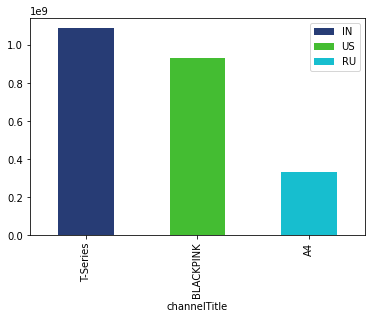

In [ ]:
# adding patches to provide custom colors for all histogram by country

colours = {"IN": "#273c75", "US": "#44bd32", "RU": "#17becf"}
plt.clf()
a.plot(x='channelTitle',y='sum(view_count)',kind='bar',color=a['country'].replace(colours)).legend(
    [
        Patch(facecolor=colours['IN']),
        Patch(facecolor=colours['US']),
        Patch(facecolor=colours['RU'])
    ], ["IN", "US","RU"]
)

display()

## ***Plotting the average time taken for a youtube video to trend from the time it was published***

In [68]:
video_data.dtypes

Unnamed: 0            int64
video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

converting trending date and publish date into the appropriate format

published at was converted directly, however, it took some string manipulation to convert it into the appropriate format.

20 was added to the start of the string in order to make is suitable for the function to later convert it into date time

In [69]:
video_data['publishedAt'] = video_data['publishedAt'].astype('datetime64[ns]')
video_data['trending_date'] = ['20'] + video_data['trending_date']

In [70]:
video_data.dtypes

Unnamed: 0                    int64
video_id                     object
title                        object
publishedAt          datetime64[ns]
channelId                    object
channelTitle                 object
categoryId                    int64
trending_date                object
tags                         object
view_count                    int64
likes                         int64
dislikes                      int64
comment_count                 int64
thumbnail_link               object
comments_disabled              bool
ratings_disabled               bool
description                  object
dtype: object

In [71]:
video_data['trending_date'] = pd.to_datetime(video_data['trending_date'], format = "%Y.%d.%m")

In [72]:
video_data.dtypes

Unnamed: 0                    int64
video_id                     object
title                        object
publishedAt          datetime64[ns]
channelId                    object
channelTitle                 object
categoryId                    int64
trending_date        datetime64[ns]
tags                         object
view_count                    int64
likes                         int64
dislikes                      int64
comment_count                 int64
thumbnail_link               object
comments_disabled              bool
ratings_disabled               bool
description                  object
dtype: object

Now lets make a new column time difference to see how much time is required

In [73]:
video_data['time_diff'] = video_data['trending_date'] - video_data['publishedAt']

*average* time for a video to go viral --
Almost four days but for simplicit we will say it as more than three days

In [74]:
video_data.time_diff.mean()

Timedelta('3 days 21:35:21.177333333')

unique channels

It has 6000 row checking if all were updated by unique channels

746 unique channels

In [75]:
video_data.channelTitle.nunique()

746

changing the date type to numerical in order for us to plot time diff adding a new variable for time diff to convert into hours

In [76]:
video_data.dtypes

Unnamed: 0                     int64
video_id                      object
title                         object
publishedAt           datetime64[ns]
channelId                     object
channelTitle                  object
categoryId                     int64
trending_date         datetime64[ns]
tags                          object
view_count                     int64
likes                          int64
dislikes                       int64
comment_count                  int64
thumbnail_link                object
comments_disabled               bool
ratings_disabled                bool
description                   object
time_diff            timedelta64[ns]
dtype: object

Dividing it by timedelta data frame to convert it into hours

In [77]:
video_data['time_diff_hour'] = video_data['time_diff'] / pd.Timedelta('1 hour')

In [78]:
us = video_data

On an average 93 hours

In [79]:
us['time_diff_hour'].mean()

93.58921592592586

checking how many days - around four days

In [80]:
us['time_diff_hour'].mean() / 24

3.899550663580244

In [81]:
import seaborn as sns

The average value of the columns is 93 and we can see some extreme values. We are subtracting extreme values in order to have an accurate depiction

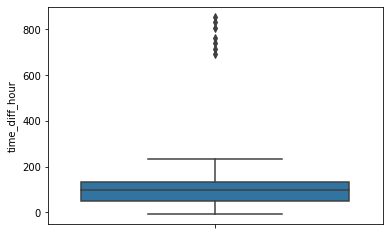

In [82]:
sns.boxplot(data=us, y='time_diff_hour')

Removing outliers - as we can see that there are only seven values so removing them

In [83]:
len(us)

6000

In [84]:
len(us[us.time_diff_hour > 600])

7

In [85]:
us = us[us.time_diff_hour <= 600]

This looks good, we can clearly seee from the barchart and box plot that the average time taken in hours is around 93.

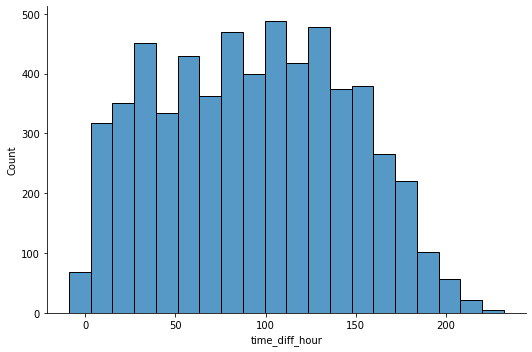

In [86]:
sns.displot(data=us, x='time_diff_hour', kind='hist',
aspect=1.5, bins=20)

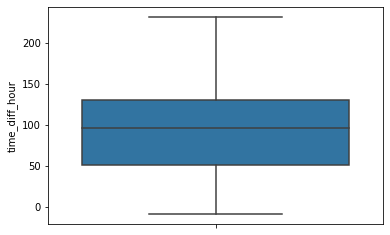

In [87]:
sns.boxplot(data=us, y='time_diff_hour')

### ***Finding the most common words in trending data***

Although not included in the final eda we also saw the most common words that were found in trending data

In [ ]:
us['title'][:5]

0    Meatpacking: Last Week Tonight with John Olive...
1    Best 3D Pen Art Wins $5,000 Challenge! | ZHC C...
2                     100 Days - [Minecraft Superflat]
3    Amazing! Luke Bryan Calls 15-Year-Old Casey Bi...
4             Game Theory: Did Reddit Just SOLVE FNAF?
Name: title, dtype: object

removing punctuations and lowering the the strings

In [ ]:
us['title'] = us.loc[:,'title'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
us.dtypes

Unnamed: 0                     int64
video_id                      object
title                         object
publishedAt           datetime64[ns]
channelId                     object
channelTitle                  object
categoryId                     int64
trending_date         datetime64[ns]
tags                          object
view_count                     int64
likes                          int64
dislikes                       int64
comment_count                  int64
thumbnail_link                object
comments_disabled               bool
ratings_disabled                bool
description                   object
time_diff            timedelta64[ns]
time_diff_hour               float64
dtype: object

changing the title to a string

In [ ]:
us['title'] = us['title'].astype('string')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
us['title'][:5]

0    meatpacking: last week tonight with john olive...
1    best 3d pen art wins $5,000 challenge! | zhc c...
2                     100 days - [minecraft superflat]
3    amazing! luke bryan calls 15-year-old casey bi...
4             game theory: did reddit just solve fnaf?
Name: title, dtype: object

removing punctuations

In [ ]:
us['title'] = us['title'].str.replace(r'[^\w\s]+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
us['title'][:5]

0    meatpacking last week tonight with john oliver...
1      best 3d pen art wins 5000 challenge  zhc crafts
2                        100 days  minecraft superflat
3    amazing luke bryan calls 15yearold casey bisho...
4               game theory did reddit just solve fnaf
Name: title, dtype: object

Views per million

In [ ]:
us['views_mil'] = us['view_count'] / 1000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


aggregating by mean and count of views

In [ ]:
us[['channelTitle','views_mil']].groupby('channelTitle')\
.agg(['mean','count'])\
.sort_values(by=('views_mil','count'), ascending=False)[:10]

views_mil      
                          mean count
channelTitle                        
BLACKPINK            25.132034    39
Saturday Night Live   2.507190    34
I Talk                0.413843    32
The Game Theorists    2.955561    31
Bruno Mars            6.652626    30
LazarBeam             6.391840    30
Overtime              0.664673    29
MrBeast Shorts        8.259474    29
Dream Shorts          2.095947    28
House of Highlights   1.030038    28

Black Pink has the highest average with 25 million view per video

# ***Number of videos that became trending on each date***

We will plot a line plot in order to show the total number of videos that were trending on a particular day.

Again not used in the final EDA presented

In [ ]:
daily = us[['trending_date']].value_counts().reset_index()\
.sort_values(by='trending_date').reset_index(drop=True)

In [ ]:
daily

,trending_date,0
0,2021-02-22,199
1,2021-02-23,199
2,2021-02-24,199
3,2021-02-25,200
4,2021-02-26,200
5,2021-02-27,200
6,2021-02-28,200
7,2021-03-01,200
8,2021-03-02,200
9,2021-03-03,200


In [ ]:
daily[0] = daily[0].astype('float')

In [ ]:
daily.dtypes

trending_date    datetime64[ns]
0                         int64
dtype: object

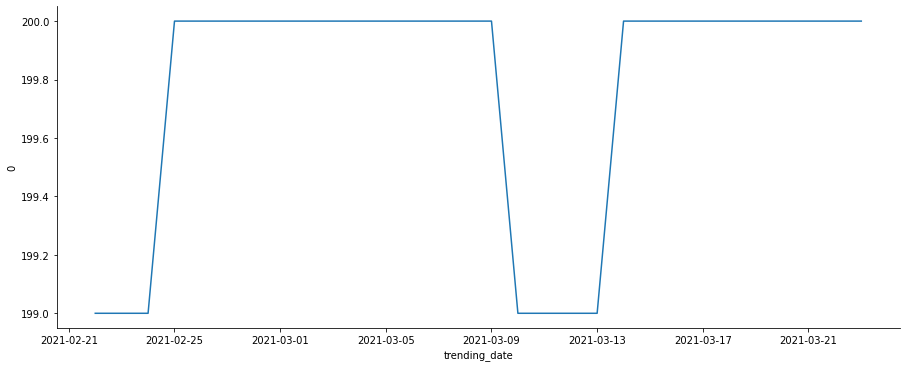

In [ ]:
sns.relplot(data=daily, x='trending_date', y=0,
kind='line', aspect=2.5)

In [ ]:
daily.dtypes

trending_date    datetime64[ns]
0                         int64
dtype: object

In [ ]:
us.sort_values(by='view_count', ascending=False)[['title','view_count']].iloc[0,:]

title         rosé  on the ground mv
view_count                 106577789
Name: 5593, dtype: object

# ***India - Time required to trend from the time it is published***

Now we will repea the whole process for India but only for the part where we have shown previously the time it will be required for a channel to trend from the point it was published


On an average we will see around 40 hours


In [33]:
video_data_IN.dtypes


Unnamed: 0            int64
video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

Appropriate date time conversion

In [34]:
video_data_IN['publishedAt'] = video_data_IN['publishedAt'].astype('datetime64[ns]')
video_data_IN['trending_date'] = ['20'] + video_data_IN['trending_date']

In [35]:

video_data_IN['trending_date'] = pd.to_datetime(video_data_IN['trending_date'], format = "%Y.%d.%m")
video_data_IN['time_diff'] = video_data_IN['trending_date'] - video_data_IN['publishedAt']

It takes around 2 days for a video to be viral

In [36]:
video_data_IN.time_diff.mean()

Timedelta('2 days 01:41:12.899501803')

871 unique channels

In [37]:
video_data_IN.channelTitle.nunique()

871

Time difference in hours

In [38]:
video_data_IN['time_diff_hour'] = video_data_IN['time_diff'] / pd.Timedelta('1 hour')

In [54]:
IN = video_data_IN

Converting into days

In [55]:

IN['time_diff_hour'].mean()

IN['time_diff_hour'].mean() / 24

2.0702881886782625

Removing outliers and plotting them

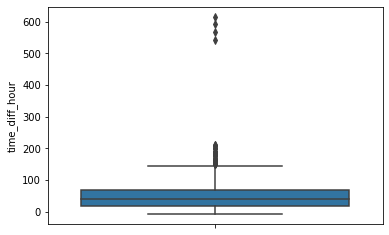

In [56]:
import seaborn as sns

sns.boxplot(data=IN, y='time_diff_hour')

In [51]:
len(IN)

5817

In [57]:


len(IN[IN.time_diff_hour > 300])

4

In [58]:
IN = IN[IN.time_diff_hour <= 300]

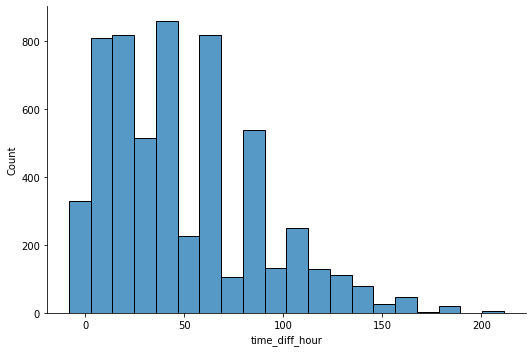

In [59]:
sns.displot(data=IN, x='time_diff_hour', kind='hist',
aspect=1.5, bins=20)

In [61]:
IN = IN[IN.time_diff_hour <= 150]

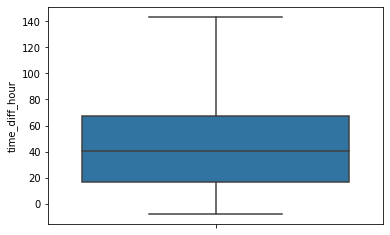

In [62]:
sns.boxplot(data=IN, y='time_diff_hour')

# ***Russia - Time required to trend from the time it is published***

Now we will repea the whole process for India but only for the part where we have shown previously the time it will be required for a channel to trend from the point it was published


On an average we will see around 11 - 15  hours

In [120]:
video_data_RU.dtypes


Unnamed: 0            int64
video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

In [121]:
video_data_RU['publishedAt'] = video_data_RU['publishedAt'].astype('datetime64[ns]')
video_data_RU['trending_date'] = ['20'] + video_data_RU['trending_date']

In [122]:

video_data_RU['trending_date'] = pd.to_datetime(video_data_RU['trending_date'], format = "%Y.%d.%m")
video_data_RU['time_diff'] = video_data_RU['trending_date'] - video_data_RU['publishedAt']

In [123]:
video_data_RU.time_diff.mean()

Timedelta('0 days 19:44:13.542028018')

In [124]:
video_data_RU.channelTitle.nunique()

1497

In [125]:
video_data_RU['time_diff_hour'] = video_data_RU['time_diff'] / pd.Timedelta('1 hour')

In [126]:
ru = video_data_RU

In [127]:

ru['time_diff_hour'].mean()

ru['time_diff_hour'].mean() / 24

0.8223789586576178

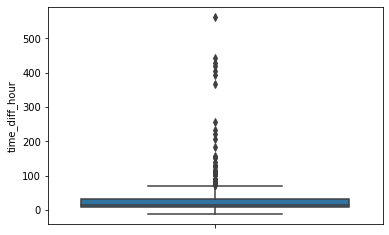

In [128]:
import seaborn as sns

sns.boxplot(data=ru, y='time_diff_hour')

In [98]:
len(ru)

5996

In [152]:


len(ru[ru.time_diff_hour > 65])

71

In [140]:
ru[ru['time_diff_hour'] < 0] = 10

In [153]:
run = ru[ru.time_diff_hour <= 65]

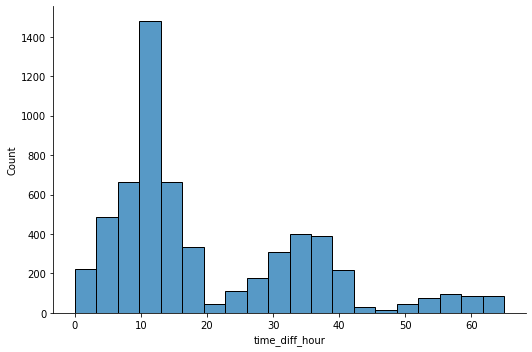

In [154]:
sns.displot(data=run, x='time_diff_hour', kind='hist',
aspect=1.5, bins=20)

In [114]:
ru = ru[ru.time_diff_hour <= 66]

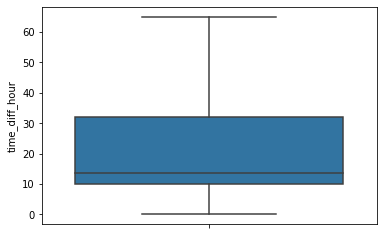

In [155]:
sns.boxplot(data=run, y='time_diff_hour')

# ***Let's see that which hours makes the possibility of a video trend the most***

***United States - 17th hour***

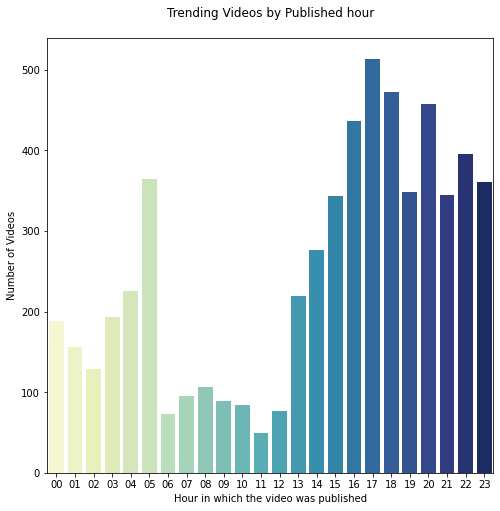

In [157]:
video_data["publish_hour"] = video_data["publishedAt"].apply(lambda x: x[11:13])

# plot no of videos published by hour 
videos_by_pub_hour = video_data.groupby("publish_hour").size().reset_index(name="no_of_videos")
    
fig, ax = plt.subplots(figsize=(8,8))
vph_plot = sns.barplot(x="publish_hour", y="no_of_videos", data=videos_by_pub_hour,palette="YlGnBu")
vph_plot = ax.set(xlabel="Hour in which the video was published", ylabel="Number of Videos")
plt.title("Trending Videos by Published hour\n")
plt.show()

**India - 5th hour**

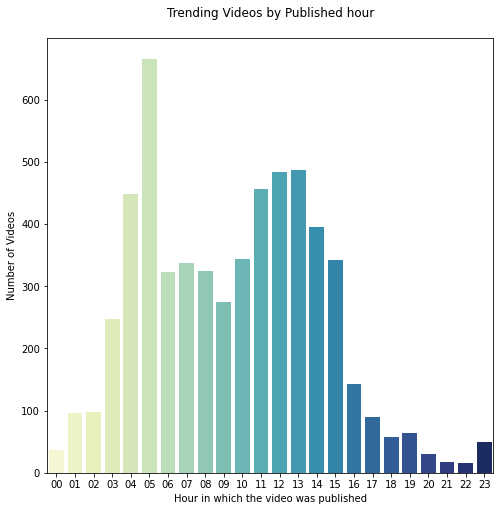

In [158]:
video_data_IN["publish_hour"] = video_data_IN["publishedAt"].apply(lambda x: x[11:13])

# plot no of videos published by hour 
videos_by_pub_hour = video_data_IN.groupby("publish_hour").size().reset_index(name="no_of_videos")
    
fig, ax = plt.subplots(figsize=(8,8))
vph_plot = sns.barplot(x="publish_hour", y="no_of_videos", data=videos_by_pub_hour,palette="YlGnBu")
vph_plot = ax.set(xlabel="Hour in which the video was published", ylabel="Number of Videos")
plt.title("Trending Videos by Published hour\n")
plt.show()

In [168]:
video_data_RU.drop(video_data_RU[video_data_RU.publishedAt == 10].index, inplace=True)

In [170]:
video_data_RU.head()

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,time_diff,time_diff_hour
2,2,I-7cJVEPfv8,Кокляев наказал Тарасова / Бой Михаил Кокляев ...,2021-02-20 21:34:47,UCkrbi2bmw7DQuuC8k4TP-QA,TRUE GYM MMA,17,2021-02-22 00:00:00,кокляев|тарасов|бой|михаил кокляев|артём тарас...,1432382,20701,23039,12732,https://i.ytimg.com/vi/I-7cJVEPfv8/default.jpg,False,False,Кокляев наказал Тарасова / Бой Михаил Кокляев ...,1 days 02:25:13,26.420278
4,4,ayPW7UW9H2Q,ЦИРКУЛОБЗИК И МОЛОТИЖЫ,2021-02-21 10:00:00,UCsJR1qQDNyFvsX_9_bNM63A,Доктор Дью,23,2021-02-22 00:00:00,DIY|самоделки|сделай себе|wow|топ самоделок|ин...,916592,95052,1787,6339,https://i.ytimg.com/vi/ayPW7UW9H2Q/default.jpg,False,False,Беспроводные наушники CGPods: влаго-защита и 2...,0 days 14:00:00,14.000000
6,6,XDrr1aTX2ek,Вечер бокса Кокляев - Тарасов / Дацик - Тайсон...,2021-02-20 23:42:51,UCkrbi2bmw7DQuuC8k4TP-QA,TRUE GYM MMA,17,2021-02-22 00:00:00,тарасов кокляев бой|дацик тайсон бой|новоселов...,3137893,40539,13461,6502,https://i.ytimg.com/vi/XDrr1aTX2ek/default.jpg,False,False,"Прямой эфир вечера бокса / Кокляев - Тарасов, ...",1 days 00:17:09,24.285833
9,9,CHRn9Sipy-M,"Вернуть своё, любой ценой! | Hyundai Solaris",2021-02-21 16:01:29,UCLlSts9lJLf90vFFNx7le4w,Максим Шелков,2,2021-02-22 00:00:00,Максим Шелков|автокриминалист|схема|автохлам|ц...,381392,20951,523,2725,https://i.ytimg.com/vi/CHRn9Sipy-M/default.jpg,False,False,Проверка автомобиля на ПроАвто - http://bit.ly...,0 days 07:58:31,7.975278
11,11,XPBaJVBV9kI,Последнее слово Навального. Россия будет счаст...,2021-02-20 17:00:43,UCsAw3WynQJMm7tMy093y37A,Алексей Навальный,29,2021-02-22 00:00:00,Навальный|Навальный2018|Фонд борьбы с коррупци...,2099677,188083,5631,27965,https://i.ytimg.com/vi/XPBaJVBV9kI/default.jpg,False,False,"Мосгорсуд оставил в силе приговор Навальному, ...",1 days 06:59:17,30.988056


In [171]:
video_data_RU['publishedAt'] = video_data_RU['publishedAt'].astype('object')

***Russia - 9th and 13th hour***

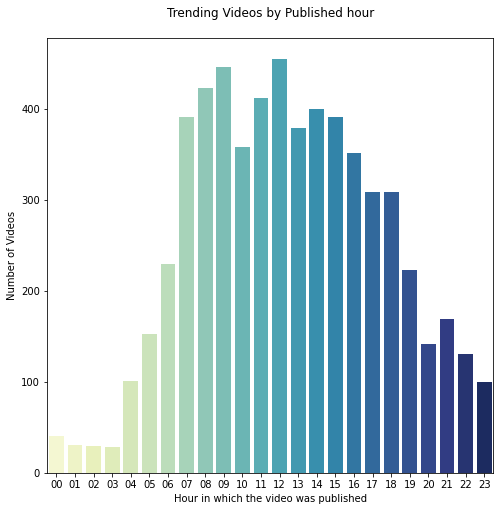

In [180]:
video_data_RU["publish_hour"] = video_data_RU["publishedAt"].apply(lambda x: x[11:13])

# plot no of videos published by hour 
videos_by_pub_hour = video_data_RU.groupby("publish_hour").size().reset_index(name="no_of_videos")
    
fig, ax = plt.subplots(figsize=(8,8))
vph_plot = sns.barplot(x="publish_hour", y="no_of_videos", data=videos_by_pub_hour,palette="YlGnBu")
vph_plot = ax.set(xlabel="Hour in which the video was published", ylabel="Number of Videos")
plt.title("Trending Videos by Published hour\n")
plt.show()

### Categories EDA

Creating the category dictionary to map category ID to actual categories

In [19]:
category_dict={0: 'Film and Animation',
               1: 'Autos & Vehicles', 
               2: 'Music',
               3: 'Pets and Animals',
               4: 'Sports',
               5: 'Short Movies',
               6: 'Travel and Events',
               7: 'Gaming',
               8: 'Video Blogging',
               9: 'People and Blogs',
               10: 'Comedy',
               11: 'Entertainment',
               12: 'News and politics',
               13: 'Howto and Style',
               14: 'Education',
               15: 'Science and Technology',
               16: 'Nonprofits and activisim',
               17: 'Movies',
               18: 'Anime/Animation',
               19: 'Action/Adventure',
               20: 'Classics',
               21: 'Comedy',
               22: 'Documentary',
               23: 'Drama',
               24: 'Family',
               25: 'Foreign',
               26: 'Horror',
               27: 'Sci-Fi/Fantasy',
               28: 'Thriller',
               29: 'Shorts',
               30: 'Shows',
               31: 'Trailers' }

Reading the data for US, India, Russia

In [20]:
US_data=pd.read_csv('US_videos_data.csv')
IN_data=pd.read_csv('IN_videos_data.csv')
RU_data=pd.read_csv('RU_videos_data.csv')

Creating function to group by category_id and get the total view count on a specific category. This will tell us what the users want to watch. We keep only top 5 categories

In [21]:
def get_category_stats(data):
  test=(data.groupby('categoryId').sum('view_count'))
  test=test[['view_count']]
  test['category']= test.index.map(category_dict)
  
  test=test.sort_values(by='view_count', ascending=False).head(5)

  return test


Creating a function to group by category_id and the count of videos in each category. This will tell us the kind of content produced on Youtube for each category. Then we filtered everything to keep only top 5 categories

In [22]:
def get_count_videos_uploaded_by_ctg (data):
  count_data=data.groupby('categoryId').count().sort_values(by='video_id',ascending=False)
  count_data['category']= count_data.index.map(category_dict)
  count_data=count_data[['category','video_id']].head(5)

  return count_data


In [23]:
import seaborn as sns

ctg_US=get_category_stats(US_data)
count_US=get_count_videos_uploaded_by_ctg(US_data)

ctg_IN=get_category_stats(IN_data)
count_IN=get_count_videos_uploaded_by_ctg(IN_data)

ctg_RU=get_category_stats(RU_data)
count_RU=get_count_videos_uploaded_by_ctg(RU_data)

US analysis

Text(0.5, 0, 'Category of video')

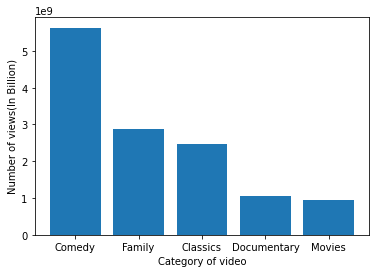

In [24]:
plt.bar(ctg_US['category'],ctg_US['view_count'])
plt.ylabel("Number of views(In Billion)")
plt.xlabel("Category of video")

Text(0.5, 0, 'Category of video')

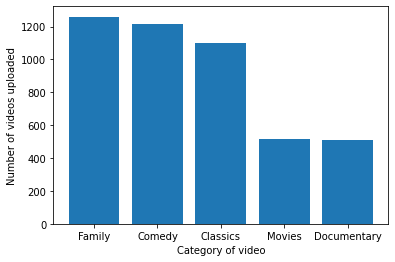

In [25]:
plt.bar(count_US['category'],count_US['video_id'])
plt.ylabel("Number of videos uploaded")
plt.xlabel("Category of video")

India Analysis

Text(0.5, 0, 'Category of video')

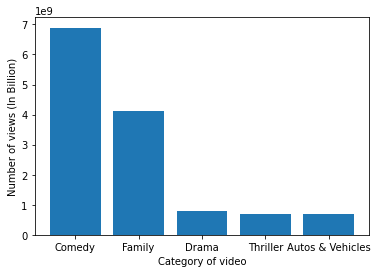

In [26]:
plt.bar(ctg_IN['category'],ctg_IN['view_count'])
plt.ylabel("Number of views (In Billion)")
plt.xlabel("Category of video")

Text(0.5, 0, 'Category of video')

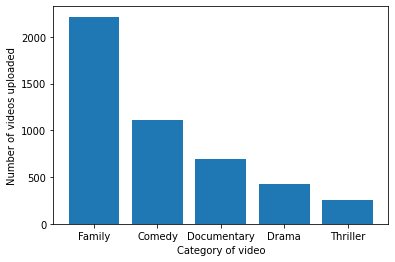

In [27]:
plt.bar(count_IN['category'],count_IN['video_id'])
plt.ylabel("Number of videos uploaded")
plt.xlabel("Category of video")

Russia Analysis

Text(0.5, 0, 'Category of video')

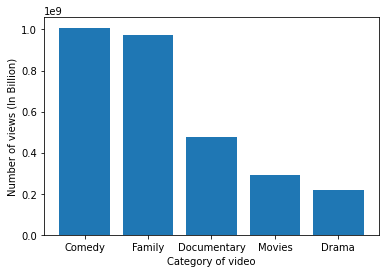

In [28]:
plt.bar(ctg_RU['category'],ctg_RU['view_count'])
plt.ylabel("Number of views (In Billion)")
plt.xlabel("Category of video")

Text(0.5, 0, 'Category of video')

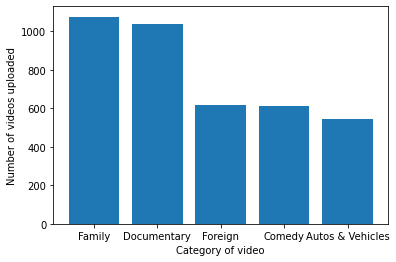

In [29]:
plt.bar(count_RU['category'],count_RU['video_id'])
plt.ylabel("Number of videos uploaded")
plt.xlabel("Category of video")

Tried and Failed

#### Trying Topic Modelling using LDA on Video Titles
#### Cosine Similarity

In addition we have tried to extract topics by using LDA through another nlp approach and then find the cosine similarity between them in order to see if two different regions are interested in similar or varying topics. However, we were not able to be successful in it.

Still showing it as an effort of what we tried to acheive

### Data Preprocessing

For convenience, given that the dataset is small, we load the spark dataframe

In [37]:
#video_data=pd.read_csv('US_videos_data.csv/US_videos_data.csv')
df = spark.read.csv('US_videos_data.csv',header=True)



Fixing Column types

In [38]:
df=df.withColumn("view_count", df["view_count"].cast("int"))\
.withColumn("likes", df["likes"].cast("int"))\
.withColumn("dislikes", df["dislikes"].cast("int"))\
.withColumn("comment_count", df["comment_count"].cast("int"))\
.withColumn("trending_date", to_timestamp(df["trending_date"], "yy.dd.MM"))\
.withColumn("time_published", to_timestamp(df["publishedAt"], "yyyy-MM-dd"))\
.withColumn("categoryId", df["categoryId"].cast('int'))\
.select('video_id','view_count','title','tags','channelTitle','categoryId','likes','dislikes','comment_count')


In [39]:
## Data for modelling
Regression_data=df

Tokenizing the column 'title'

In [40]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
tokenizer = Tokenizer(inputCol="title", outputCol="Tokens_title")
df = tokenizer.transform(df)

In [41]:
df.limit(3).show()

+-----------+----------+--------------------+--------------------+---------------+----------+------+--------+-------------+--------------------+
|   video_id|view_count|               title|                tags|   channelTitle|categoryId| likes|dislikes|comment_count|        Tokens_title|
+-----------+----------+--------------------+--------------------+---------------+----------+------+--------+-------------+--------------------+
|IhO1FcjDMV4|   1067147|Meatpacking: Last...|              [none]|LastWeekTonight|        24| 60111|    1221|         6866|[meatpacking:, la...|
|p4Wy84AOzj0|   1047854|Best 3D Pen Art W...|              [none]|     ZHC Crafts|        26| 50662|     690|         4879|[best, 3d, pen, a...|
|4eKXwKDdXYA|   6133266|100 Days - [Minec...|luke thenotable|l...|Luke TheNotable|        20|372753|    7961|        39551|[100, days, -, [m...|
+-----------+----------+--------------------+--------------------+---------------+----------+------+--------+-------------+-------

Removing Stop Words from Title

In [42]:
from pyspark.ml.feature import StopWordsRemover
remover = StopWordsRemover(inputCol="Tokens_title", outputCol="filtered_tokens_title")
df=remover.transform(df)

In [43]:
df.limit(3).show()

+-----------+----------+--------------------+--------------------+---------------+----------+------+--------+-------------+--------------------+---------------------+
|   video_id|view_count|               title|                tags|   channelTitle|categoryId| likes|dislikes|comment_count|        Tokens_title|filtered_tokens_title|
+-----------+----------+--------------------+--------------------+---------------+----------+------+--------+-------------+--------------------+---------------------+
|IhO1FcjDMV4|   1067147|Meatpacking: Last...|              [none]|LastWeekTonight|        24| 60111|    1221|         6866|[meatpacking:, la...| [meatpacking:, la...|
|p4Wy84AOzj0|   1047854|Best 3D Pen Art W...|              [none]|     ZHC Crafts|        26| 50662|     690|         4879|[best, 3d, pen, a...| [best, 3d, pen, a...|
|4eKXwKDdXYA|   6133266|100 Days - [Minec...|luke thenotable|l...|Luke TheNotable|        20|372753|    7961|        39551|[100, days, -, [m...| [100, days, -, [m...

#### Trying Topic Modelling using LDA on Video Titles

In [44]:
LDA_data=df

In [45]:
LDA_data.columns

['video_id',
 'view_count',
 'title',
 'tags',
 'channelTitle',
 'categoryId',
 'likes',
 'dislikes',
 'comment_count',
 'Tokens_title',
 'filtered_tokens_title']

In [46]:
test_data=LDA_data.limit(3)

In [47]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer

In [48]:
hashingTF = HashingTF(inputCol="filtered_tokens_title", outputCol="TF", numFeatures=20)
featurizedData = hashingTF.transform(test_data)

In [49]:
featurizedData.show()

+-----------+----------+--------------------+--------------------+---------------+----------+------+--------+-------------+--------------------+---------------------+--------------------+
|   video_id|view_count|               title|                tags|   channelTitle|categoryId| likes|dislikes|comment_count|        Tokens_title|filtered_tokens_title|                  TF|
+-----------+----------+--------------------+--------------------+---------------+----------+------+--------+-------------+--------------------+---------------------+--------------------+
|IhO1FcjDMV4|   1067147|Meatpacking: Last...|              [none]|LastWeekTonight|        24| 60111|    1221|         6866|[meatpacking:, la...| [meatpacking:, la...|(20,[1,2,3,9],[1....|
|p4Wy84AOzj0|   1047854|Best 3D Pen Art W...|              [none]|     ZHC Crafts|        26| 50662|     690|         4879|[best, 3d, pen, a...| [best, 3d, pen, a...|(20,[1,3,5,12,13,...|
|4eKXwKDdXYA|   6133266|100 Days - [Minec...|luke thenotable

In [50]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
idf = IDF(inputCol="TF", outputCol="features")
idfModel = idf.fit(featurizedData)
result_tfidf = idfModel.transform(featurizedData) 

In [51]:
result_tfidf.show()

+-----------+----------+--------------------+--------------------+---------------+----------+------+--------+-------------+--------------------+---------------------+--------------------+--------------------+
|   video_id|view_count|               title|                tags|   channelTitle|categoryId| likes|dislikes|comment_count|        Tokens_title|filtered_tokens_title|                  TF|            features|
+-----------+----------+--------------------+--------------------+---------------+----------+------+--------+-------------+--------------------+---------------------+--------------------+--------------------+
|IhO1FcjDMV4|   1067147|Meatpacking: Last...|              [none]|LastWeekTonight|        24| 60111|    1221|         6866|[meatpacking:, la...| [meatpacking:, la...|(20,[1,2,3,9],[1....|(20,[1,2,3,9],[0....|
|p4Wy84AOzj0|   1047854|Best 3D Pen Art W...|              [none]|     ZHC Crafts|        26| 50662|     690|         4879|[best, 3d, pen, a...| [best, 3d, pen, a..

In [52]:
from pyspark.mllib.clustering import LDA
result_tfidf=result_tfidf.select('video_id','features')
num_topics = 2
max_iterations = 3
#lda_model = LDA.train(result_tfidf.rdd, k=num_topics, maxIterations=max_iterations)
lda = LDA()
#lda=LDA.train(featurizedData['TF'].rdd,k=2)
#LDA.train()

In [53]:
lda.setMaxIter(10)

AttributeError: ignored

In [54]:
featurizedData.show()

+-----------+----------+--------------------+--------------------+---------------+----------+------+--------+-------------+--------------------+---------------------+--------------------+
|   video_id|view_count|               title|                tags|   channelTitle|categoryId| likes|dislikes|comment_count|        Tokens_title|filtered_tokens_title|                  TF|
+-----------+----------+--------------------+--------------------+---------------+----------+------+--------+-------------+--------------------+---------------------+--------------------+
|IhO1FcjDMV4|   1067147|Meatpacking: Last...|              [none]|LastWeekTonight|        24| 60111|    1221|         6866|[meatpacking:, la...| [meatpacking:, la...|(20,[1,2,3,9],[1....|
|p4Wy84AOzj0|   1047854|Best 3D Pen Art W...|              [none]|     ZHC Crafts|        26| 50662|     690|         4879|[best, 3d, pen, a...| [best, 3d, pen, a...|(20,[1,3,5,12,13,...|
|4eKXwKDdXYA|   6133266|100 Days - [Minec...|luke thenotable

Reading data for multiple countries

In [55]:
df_IN = spark.read.csv('IN_videos_data.csv',header=True)
df_BR = spark.read.csv('BR_videos_data.csv',header=True)
df_FR = spark.read.csv('FR_videos_data.csv',header=True)
df_CA= spark.read.csv('CA_videos_data.csv',header=True)
df_RU = spark.read.csv('RU_videos_data.csv',header=True)
df_JP = spark.read.csv('JP_videos_data.csv',header=True)

In [57]:
df_MX = spark.read.csv('MX_videos_data.csv',header=True)

In [58]:
df_IN.columns

['_c0',
 'video_id',
 'title',
 'publishedAt',
 'channelId',
 'channelTitle',
 'categoryId',
 'trending_date',
 'tags',
 'view_count',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'description']

In [59]:
df_IN=df_IN.withColumn("view_count", df_IN["view_count"].cast("int"))\
.withColumn("likes", df_IN["likes"].cast("int"))\
.withColumn("dislikes", df_IN["dislikes"].cast("int"))\
.withColumn("comment_count", df_IN["comment_count"].cast("int"))\
.withColumn("trending_date", to_timestamp(df_IN["trending_date"], "yy.dd.MM"))\
.withColumn("time_published", to_timestamp(df_IN["publishedAt"], "yyyy-MM-dd"))\
.withColumn("categoryId", df_IN["categoryId"].cast('int'))\
.select('view_count','title','tags','channelTitle','categoryId')

In [60]:
df_IN_category=df_IN.groupBy('categoryId').sum().select('categoryId','sum(view_count)')

In [61]:
IN_top5_categories=df_IN_category.filter(df_IN_category['categoryId'].isNotNull()).orderBy(df_IN_category['sum(view_count)'].desc()).limit(5)

In [62]:
df_BR=df_BR.withColumn("view_count", df_BR["view_count"].cast("int"))\
.withColumn("likes", df_BR["likes"].cast("int"))\
.withColumn("dislikes", df_BR["dislikes"].cast("int"))\
.withColumn("comment_count", df_BR["comment_count"].cast("int"))\
.withColumn("trending_date", to_timestamp(df_BR["trending_date"], "yy.dd.MM"))\
.withColumn("time_published", to_timestamp(df_BR["publishedAt"], "yyyy-MM-dd"))\
.withColumn("categoryId", df_BR["categoryId"].cast('int'))\
.select('view_count','title','tags','channelTitle','categoryId')

df_BR_category=df_BR.groupBy('categoryId').sum().select('categoryId','sum(view_count)')

In [63]:
BR_top5_categories=df_BR_category.filter(df_BR_category['categoryId'].isNotNull()).orderBy(df_BR_category['sum(view_count)'].desc()).limit(5)

In [64]:
df_CA=df_CA.withColumn("view_count", df_CA["view_count"].cast("int"))\
.withColumn("likes", df_CA["likes"].cast("int"))\
.withColumn("dislikes", df_CA["dislikes"].cast("int"))\
.withColumn("comment_count", df_CA["comment_count"].cast("int"))\
.withColumn("trending_date", to_timestamp(df_CA["trending_date"], "yy.dd.MM"))\
.withColumn("time_published", to_timestamp(df_CA["publishedAt"], "yyyy-MM-dd"))\
.withColumn("categoryId", df_CA["categoryId"].cast('int'))\
.select('view_count','title','tags','channelTitle','categoryId')

df_CA_category=df_CA.groupBy('categoryId').sum().select('categoryId','sum(view_count)')

In [65]:
CA_top5_categories=df_CA_category.filter(df_CA_category['categoryId'].isNotNull()).orderBy(df_CA_category['sum(view_count)'].desc()).limit(5)

In [66]:
df_FR=df_FR.withColumn("view_count", df_FR["view_count"].cast("int"))\
.withColumn("likes", df_FR["likes"].cast("int"))\
.withColumn("dislikes", df_FR["dislikes"].cast("int"))\
.withColumn("comment_count", df_FR["comment_count"].cast("int"))\
.withColumn("trending_date", to_timestamp(df_FR["trending_date"], "yy.dd.MM"))\
.withColumn("time_published", to_timestamp(df_FR["publishedAt"], "yyyy-MM-dd"))\
.withColumn("categoryId", df_FR["categoryId"].cast('int'))\
.select('view_count','title','tags','channelTitle','categoryId')

df_FR_category=df_FR.groupBy('categoryId').sum().select('categoryId','sum(view_count)')

In [67]:
FR_top5_categories=df_FR_category.filter(df_FR_category['categoryId'].isNotNull()).orderBy(df_FR_category['sum(view_count)'].desc()).limit(5)

In [68]:
df_MX=df_MX.withColumn("view_count", df_MX["view_count"].cast("int"))\
.withColumn("likes", df_MX["likes"].cast("int"))\
.withColumn("dislikes", df_MX["dislikes"].cast("int"))\
.withColumn("comment_count", df_MX["comment_count"].cast("int"))\
.withColumn("trending_date", to_timestamp(df_MX["trending_date"], "yy.dd.MM"))\
.withColumn("time_published", to_timestamp(df_MX["publishedAt"], "yyyy-MM-dd"))\
.withColumn("categoryId", df_MX["categoryId"].cast('int'))\
.select('view_count','title','tags','channelTitle','categoryId')

df_MX_category=df_MX.groupBy('categoryId').sum().select('categoryId','sum(view_count)')

In [69]:
MX_top5_categories=df_MX_category.filter(df_MX_category['categoryId'].isNotNull()).orderBy(df_MX_category['sum(view_count)'].desc()).limit(5)

### Pairwise country Cosine Similarity

In [70]:
IN_vector=IN_top5_categories.select('categoryId').collect()
IN_array = [row[0] for row in IN_vector]

In [71]:
IN_array

[10, 24, 23, 28, 1]

In [75]:
from scipy import spatial
#US_vector=US_top5_categories.select('categoryId').collect()
US_array = [row for row in IN_array]

1 - spatial.distance.cosine(IN_array, US_array)

1.0